In [1]:
%reload_ext nb_black

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)
heartdisease_df = pd.read_sql_query("select * from heartdisease", con=engine)

engine.dispose()

<IPython.core.display.Javascript object>

In [2]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace="?", value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 0, 1)

<IPython.core.display.Javascript object>

In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

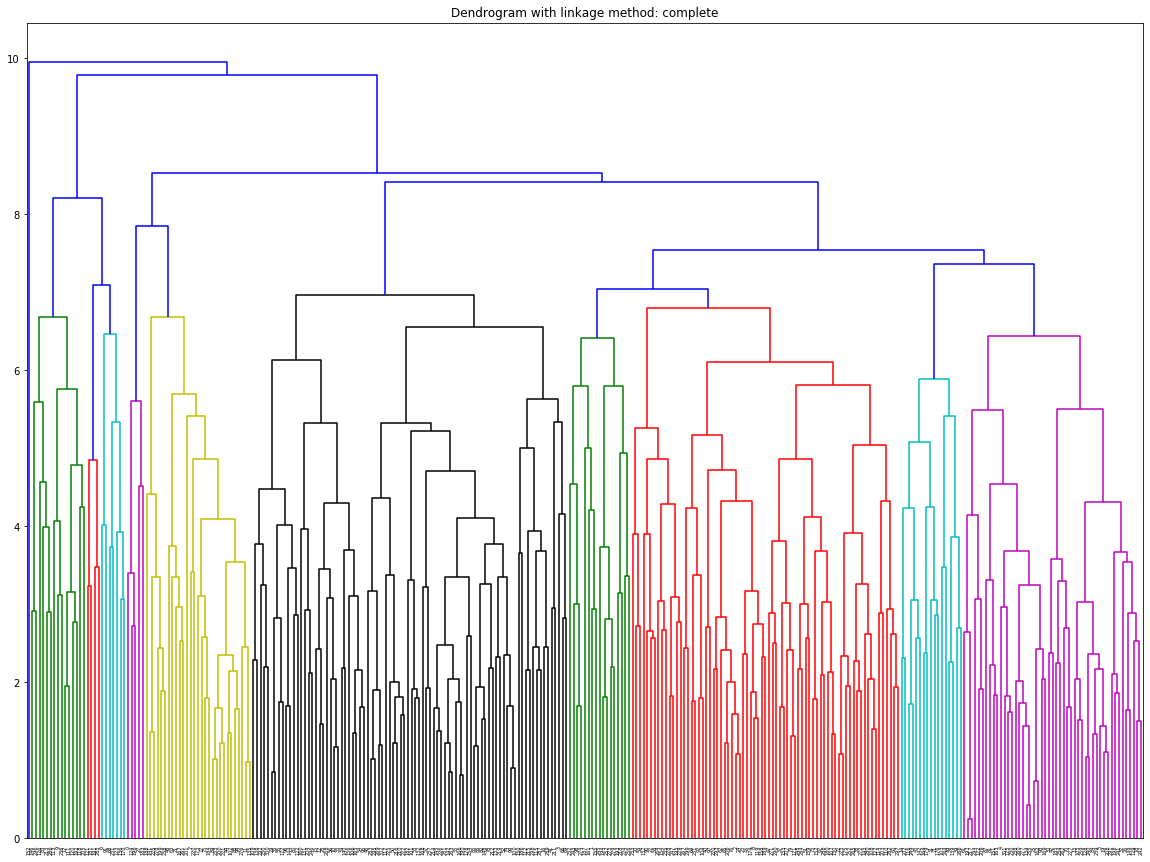

<IPython.core.display.Javascript object>

In [8]:
plt.figure(figsize=(20, 15))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method="complete"))
plt.show()

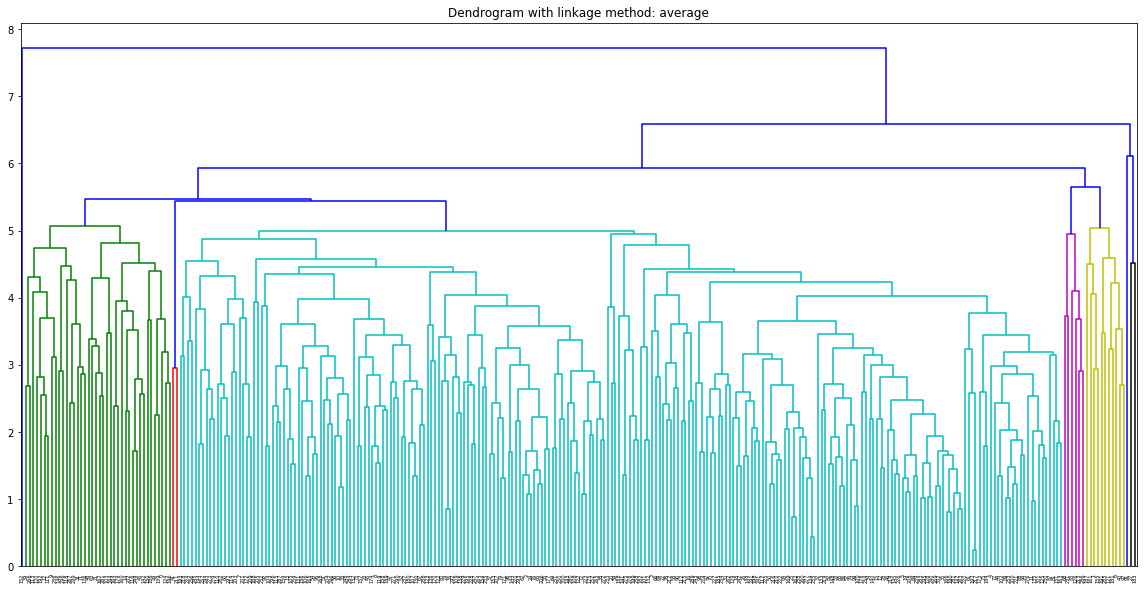

<IPython.core.display.Javascript object>

In [6]:
plt.figure(figsize=(20, 15))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method="average"))
plt.show()

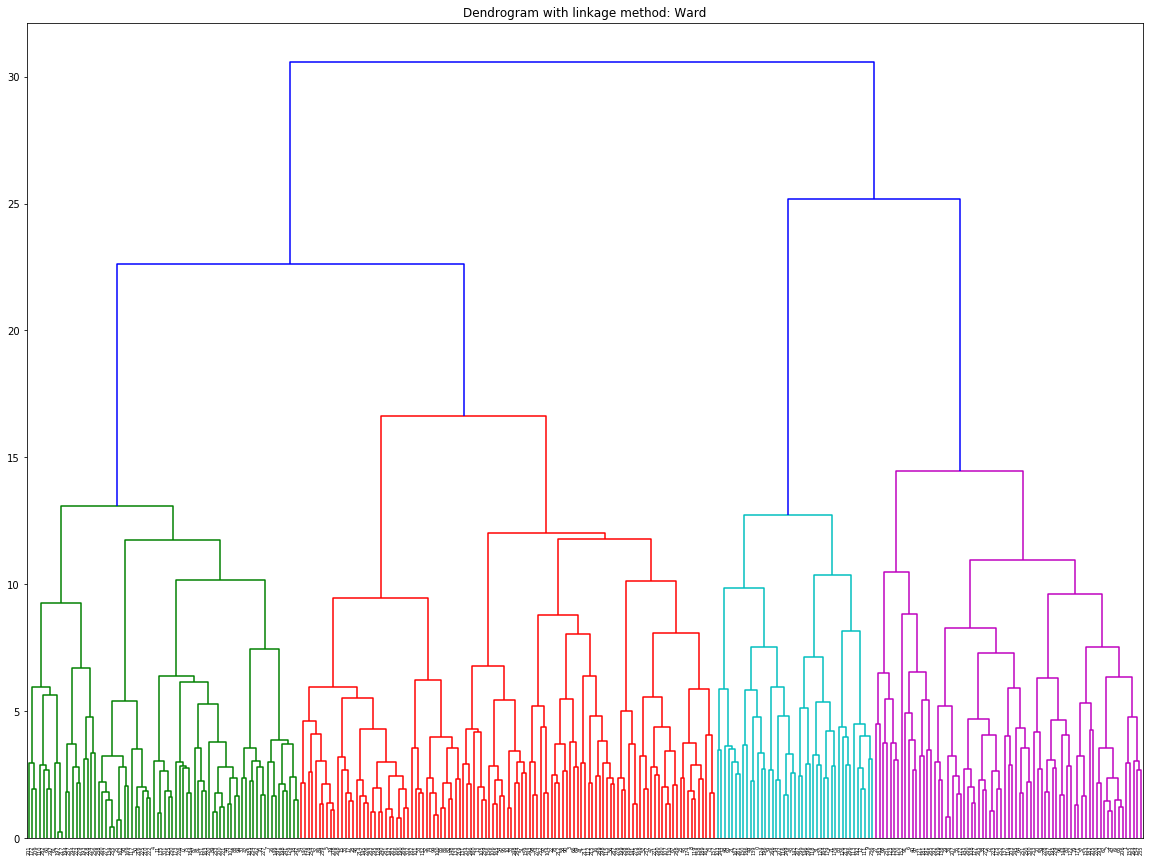

<IPython.core.display.Javascript object>

In [7]:
plt.figure(figsize=(20, 15))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method="ward"))
plt.show()

In [17]:
agg_clstr = AgglomerativeClustering(linkage="complete", affinity="cosine", n_clusters=2)
clusters = agg_clstr.fit_predict(X_std)
print(f"ARI score for complete linkage: {metrics.adjusted_rand_score(y,clusters)}")
print(
    f'Silhouette score for complete linkage: {metrics.silhouette_score(X_std, clusters, metric="euclidean")}'
)

ARI score for complete linkage: 0.21394030618551016
Silhouette score for complete linkage: 0.11730765444448985


<IPython.core.display.Javascript object>

In [18]:
agg_clstr = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=2)
clusters = agg_clstr.fit_predict(X_std)
print(f"ARI score for average linkage: {metrics.adjusted_rand_score(y,clusters)}")
print(
    f'Silhouette score for average linkage: {metrics.silhouette_score(X_std, clusters, metric="euclidean")}'
)

ARI score for average linkage: 0.2940490133353465
Silhouette score for average linkage: 0.14837359969689895


<IPython.core.display.Javascript object>

In [20]:
agg_clstr = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=2)
clusters = agg_clstr.fit_predict(X_std)
print(f"ARI score for ward linkage: {metrics.adjusted_rand_score(y,clusters)}")
print(
    f'Silhouette score for ward linkage: {metrics.silhouette_score(X_std, clusters, metric="euclidean")}'
)

ARI score for ward linkage: 0.146129913123814
Silhouette score for ward linkage: 0.1387197366557222


<IPython.core.display.Javascript object>